## IBM 직원 퇴사 데이터 분석

### Business Understanding (비즈니스이해)

#### **문제**

* 직원 퇴사율 증가

#### **가설**

* 나이가 어린 직원일수록 퇴사(이직)할 가능성이 높을 것이다.
* 출장 빈도가 높은 직원일수록 퇴사(이직)할 가능성이 높을 것이다.
* 월급이 낮은 직원일수록 퇴사(이직)할 가능성이 높을 것이다.
* 급여 인상률이 낮은 직원일수록 퇴사(이직)할 가능성이 높을 것이다.
* 스톡 옵션이 낮은 직원일수록 퇴사(이직)할 가능성이 높을 것이다.
* 집에서부터 회사까지의 거리가 먼 직원일수록 퇴사(이직)할 가능성이 높을 것이다.
* 업무 환경 만족도/직무 만족도/동료와의 관계 만족도가 낮은 직원일수록 퇴사(이직)할 가능성이 높을 것이다.
* 야근을 자주 하는 직원일수록 퇴사(이직)할 가능성이 높을 것이다.
* 워라벨이 낮은 직원일수록 퇴사(이직)할 가능성이 높을 것이다.
* 미혼/이혼 상태인 직원의 퇴사(이직) 가능성이 높을 것이다.
* 결혼한 여성의 경우 출산 후 퇴사 가능성이 높을 것이다.

### Data Understanding (데이터 이해)

#### **열**
* Y : Attrition (퇴사 여부)
* X
    * Age (나이)
    * BusinessTravel (출장 빈도)
    * DailyRate (일일 급여)
    * Department (부서)
    * DistanceFromHome (집에서부터 회사까지의 거리)
    * Education (학력 -> 1: Below College, 2: College, 3: Bachelor, 4: Master, 5: Doctor)
    * EducationField (전공)
    * EmployeeCount (직원 수 -> 전부 1)
    * EmployeeNumber (직원 고유 번호)
    * EnvironmentSatisfaction (업무 환경 만족도 -> 1: Low, 2: Medium, 3: High, 4: Very High)
    * Gender (성별)
    * HourlyRate (시급)
    * JobInvolvement (직무 참여도 -> 1: Low, 2: Medium, 3: High, 4: Very High)
    * JobLevel (직급)
    * JobRole (직무)
    * JobSatisfaction (직무 만족도 -> 1: Low, 2: Medium, 3: High, 4: Very High)
    * MaritalStatus (결혼 여부)
    * MonthlyIncome (월 소득)
    * MonthlyRate (월급)
    * NumCompaniesWorked (근무한 회사 수)
    * Over18 (18세 이상 여부 -> 전부 Y)
    * OverTime (야근)
    * PercentSalaryHike (급여 인상률)
    * PerformanceRating (성과 등급 -> 1: Low, 2: Medium, 3: High, 4: Very High)
    * RelationshipSatisfaction (동료와의 관계 만족도 -> 1: Low, 2: Medium, 3: High, 4: Very High)
    * StandardHours (근무 시간 -> 전부 80)
    * StockOptionLevel (스톡 옵션)
    * TotalWorkingYears (경력 기간)
    * TrainingTimesLastYear (지난해 받은 교육 시간)
    * WorkLifeBalance (워라벨 -> 1: Low, 2: Medium, 3: High, 4: Very High)
    * YearsAtCompany (근속 연수)
    * YearsInCurrentRole (현재 직무 경력 기간)
    * YearsSinceLastPromotion (마지막 승진 이후 경과된 시간)
    * YearsWithCurrManager (현재 관리자와 함께 일한 기간)

In [68]:
# 라이브러리 로딩
import numpy as np
import pandas as pd

In [7]:
# 데이터 로딩
data = pd.read_csv('./employee_attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# 데이터 요약 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### **2024.02.23 복습**

In [5]:
# 컬럼 확인
list(data)

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [11]:
# unique() : 고유 값 확인
print(data['BusinessTravel'].unique())  # ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
print(data['Department'].unique())  # ['Sales' 'Research & Development' 'Human Resources']
print(data['MaritalStatus'].unique())  # ['Single' 'Married' 'Divorced']

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Single' 'Married' 'Divorced']


In [13]:
# value_counts() : 고유 값 개수 확인
data['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [123]:
# value_counts(normalize = True) : 고유 값 비율 확인
data['JobRole'].value_counts(normalize = True)

JobRole
Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.035374
Name: proportion, dtype: float64

In [16]:
# sort_values(by='', ascending=) : 데이터 정렬
data.sort_values(by='MonthlyIncome', ascending=False)[['Age', 'MonthlyIncome']].head(3)

,Age,MonthlyIncome
190,52,19999
746,41,19973
851,56,19943


In [21]:
# loc[행 조건, 열 이름]
data.loc[data['BusinessTravel'] == 'Travel_Frequently', 'Department']

1       Research & Development
3       Research & Development
5       Research & Development
8       Research & Development
26      Research & Development
                 ...          
1440    Research & Development
1452                     Sales
1456    Research & Development
1465    Research & Development
1468                     Sales
Name: Department, Length: 277, dtype: object

In [33]:
# 나이가 30 이상이면서 결혼한 여성의 ['Attrition', 'Age'] 조회
data.loc[(data['Age'] >= 30) & (data['MaritalStatus'] == 'Married') & (data['Gender'] == 'Female'), ['Attrition', 'Age']]

,Attrition,Age
3,No,33
6,No,59
18,No,53
28,No,44
37,No,35
...,...,...
1451,No,38
1453,No,36
1457,No,40
1458,No,35


In [51]:
# between(a, b, inclusive='left/right/both/neither') (DistanceFromHome이 15이상 30이하인 직원의 'Attrition' 조회)
original_data.loc[original_data['DistanceFromHome'].between(15, 30), 'Attrition']

7        No
8        No
9        No
10       No
11       No
       ... 
1456     No
1460     No
1461    Yes
1462     No
1465     No
Name: Attrition, Length: 355, dtype: object

In [40]:
# isin([val1, val2, val3, ...])
data.loc[data['JobSatisfaction'].isin([4, 5]), ['JobSatisfaction', 'WorkLifeBalance']]

,JobSatisfaction,WorkLifeBalance
0,4,1
5,4,2
13,4,3
17,4,2
18,4,3
...,...,...
1451,4,3
1453,4,2
1458,4,3
1462,4,2


In [31]:
# 집계 함수 mean()
round(data.loc[data['Attrition'] == 'Yes', 'Age'].mean())

34

In [26]:
# 집계 함수 count()
total_employee = data.loc[:, 'EmployeeNumber'].count()
attrition = data.loc[data['Attrition'] == 'Yes', 'EmployeeNumber'].count()
print(f'{attrition / total_employee * 100 : .3f}%')

 16.122%


In [52]:
# groupby('집계기준변수', as_index=)['집계대상변수'].집계함수
data.loc[data['Attrition'] == 'Yes'].groupby('MaritalStatus', as_index=False)['EmployeeNumber'].count()

,MaritalStatus,EmployeeNumber
0,Divorced,33
1,Married,84
2,Single,120


In [53]:
data.groupby(['JobRole', 'Attrition'], as_index=False)['EmployeeNumber'].count()

,JobRole,Attrition,EmployeeNumber
0,Healthcare Representative,No,122
1,Healthcare Representative,Yes,9
2,Human Resources,No,40
3,Human Resources,Yes,12
4,Laboratory Technician,No,197
5,Laboratory Technician,Yes,62
6,Manager,No,97
7,Manager,Yes,5
8,Manufacturing Director,No,135
9,Manufacturing Director,Yes,10


In [57]:
# 직무 별 평균 월 수입, 직급, 야근, 근속 연수
data.groupby('JobRole', as_index=False)[['MonthlyIncome', 'JobLevel', 'YearsAtCompany']].mean()

,JobRole,MonthlyIncome,JobLevel,YearsAtCompany
0,Healthcare Representative,7528.763359,2.473282,8.374046
1,Human Resources,4235.750000,1.480769,5.326923
2,Laboratory Technician,3237.169884,1.239382,5.019305
3,Manager,17181.676471,4.303922,14.431373
4,Manufacturing Director,7295.137931,2.448276,7.600000
5,Research Director,16033.550000,3.975000,10.937500
6,Research Scientist,3239.972603,1.202055,5.113014
7,Sales Executive,6924.279141,2.328221,7.496933
8,Sales Representative,2626.000000,1.084337,2.915663


In [58]:
# 나이별 월 소득의 최댓값, 최솟값, 평균 조회하기
data.groupby('Age', as_index=False)['MonthlyIncome'].agg(['min', 'max', 'mean'])

,Age,min,max,mean
0,18,1051,1904,1518.375000
1,19,1102,2994,2075.000000
2,20,1009,3033,2539.363636
3,21,1232,3447,2491.461538
4,22,2244,4775,2950.000000
5,23,1223,3989,2515.357143
6,24,1555,4999,3243.923077
7,25,1118,8639,4144.769231
8,26,2007,6397,3531.487179
9,27,1706,12808,4190.416667


In [59]:
# 나이별 월 소득의 총합과 학력의 평균 조회하기
data.groupby('Age', as_index=False).agg({'MonthlyIncome': 'sum', 'Education': 'mean'})

,Age,MonthlyIncome,Education
0,18,12147,2.500000
1,19,18675,2.111111
2,20,27933,2.636364
3,21,32389,1.615385
4,22,47200,1.812500
5,23,35215,1.857143
6,24,84342,2.115385
7,25,107764,1.923077
8,26,137728,2.641026
9,27,201140,2.666667


#### **데이터프레임 구조 만들기**

##### **컬럼 삭제**

'MonthlyIncome'과 중복되는 'DailyRate', 'HourlyRate', 'MonthlyRate' 컬럼과, 
<br>
모든 직원이 동일한 값을 가지고 있는 'EmployeeCount', 'Over18', 'StandardHours'는 고려하지 않는다.

In [8]:
data2 = data.copy()

data2.drop(['DailyRate', 'HourlyRate', 'MonthlyRate', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)
data2

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,2062,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,Medical,2065,4,Male,...,3,4,0,17,3,2,9,6,0,8


##### **컬럼 이름 변경**

In [9]:
# data2.columns = [] / data2.rename(columns = {})
data2.rename(columns={'DistanceFromHome': 'Distance', 'EmployeeNumber': 'EmployeeNo', 'EnvironmentSatisfaction': 'E_Satisfaction', 'JobSatisfaction': 'J_Satisfaction', 'RelationshipSatisfaction': 'R_Satisfaction'}, inplace=True)
data2

,Age,Attrition,BusinessTravel,Department,Distance,Education,EducationField,EmployeeNo,E_Satisfaction,Gender,...,PerformanceRating,R_Satisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,2062,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,Sales,2,3,Medical,2065,4,Male,...,3,4,0,17,3,2,9,6,0,8


##### **컬럼 추가**

직원의 총 만족도를 구하기 위해 EnvironmentSatisfaction(환경 만족도), JobSatisfaction(직무 만족도), RelationshipSatisfaction(관계 만족도), WorkLifeBalance(워라밸) 값을 합한 Satisfaction이라는 컬럼을 추가해주었다.

In [10]:
data2['Satisfaction'] = data2['E_Satisfaction'] + data2['J_Satisfaction'] + data2['R_Satisfaction'] + data2['WorkLifeBalance']
data2.drop(['E_Satisfaction', 'J_Satisfaction', 'R_Satisfaction', 'WorkLifeBalance'], axis=1, inplace=True)
data2

,Age,Attrition,BusinessTravel,Department,Distance,Education,EducationField,EmployeeNo,Gender,JobInvolvement,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Satisfaction
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,Female,3,...,11,3,0,8,0,6,4,0,5,8
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,Male,2,...,23,4,1,10,3,10,7,1,7,12
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,15,3,0,7,3,0,0,0,0,12
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,Female,3,...,11,3,0,8,3,8,7,3,0,13
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,Male,3,...,12,3,1,6,3,2,2,2,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,Research & Development,23,2,Medical,2061,Male,4,...,17,3,1,17,3,5,2,0,3,13
1466,39,No,Travel_Rarely,Research & Development,6,1,Medical,2062,Male,2,...,15,3,1,9,5,7,7,1,7,9
1467,27,No,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,Male,4,...,20,4,1,6,0,6,2,0,3,9
1468,49,No,Travel_Frequently,Sales,2,3,Medical,2065,Male,2,...,14,3,0,17,3,9,6,0,8,12


##### **값 변경하기**

In [11]:
# np.where() : Attrition의 값이 'Yes'일 경우 1, 'No'일 경우 0으로 바꾸기
data2['Attrition'] = np.where(data2['Attrition'] == 'Yes', 1, 0)

# pd.cut() : 19세 이하 : 10대, 20 - 29 : 20대, 30 - 39 : 30대, 40 - 49 : 40대, 50 - 59 : 50대, 60세 이상 : 60대
data2['Age'] = pd.cut(data2['Age'], bins=[0, 20, 30, 40, 50, 60, 100], right=False, labels=['10대', '20대', '30대', '40대', '50대', '60대'])

# map() : OverTime 값이 'Yes'일 경우 1, 'No'일 경우 0으로 바꾸기
data2['OverTime'] = data2['OverTime'].map({'Yes': 1, 'No': 0})

data2

,Age,Attrition,BusinessTravel,Department,Distance,Education,EducationField,EmployeeNo,Gender,JobInvolvement,...,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Satisfaction
0,40대,1,Travel_Rarely,Sales,1,2,Life Sciences,1,Female,3,...,11,3,0,8,0,6,4,0,5,8
1,40대,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,Male,2,...,23,4,1,10,3,10,7,1,7,12
2,30대,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,15,3,0,7,3,0,0,0,0,12
3,30대,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,Female,3,...,11,3,0,8,3,8,7,3,0,13
4,20대,0,Travel_Rarely,Research & Development,2,1,Medical,7,Male,3,...,12,3,1,6,3,2,2,2,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,30대,0,Travel_Frequently,Research & Development,23,2,Medical,2061,Male,4,...,17,3,1,17,3,5,2,0,3,13
1466,30대,0,Travel_Rarely,Research & Development,6,1,Medical,2062,Male,2,...,15,3,1,9,5,7,7,1,7,9
1467,20대,0,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,Male,4,...,20,4,1,6,0,6,2,0,3,9
1468,40대,0,Travel_Frequently,Sales,2,3,Medical,2065,Male,2,...,14,3,0,17,3,9,6,0,8,12


#### **단변량 분석**

In [12]:
# 라이브러리 로딩
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

##### **그래프 복습**

In [93]:
# 데이터 로딩
attrition = pd.read_csv('./employee_attrition.csv').head(10)
attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


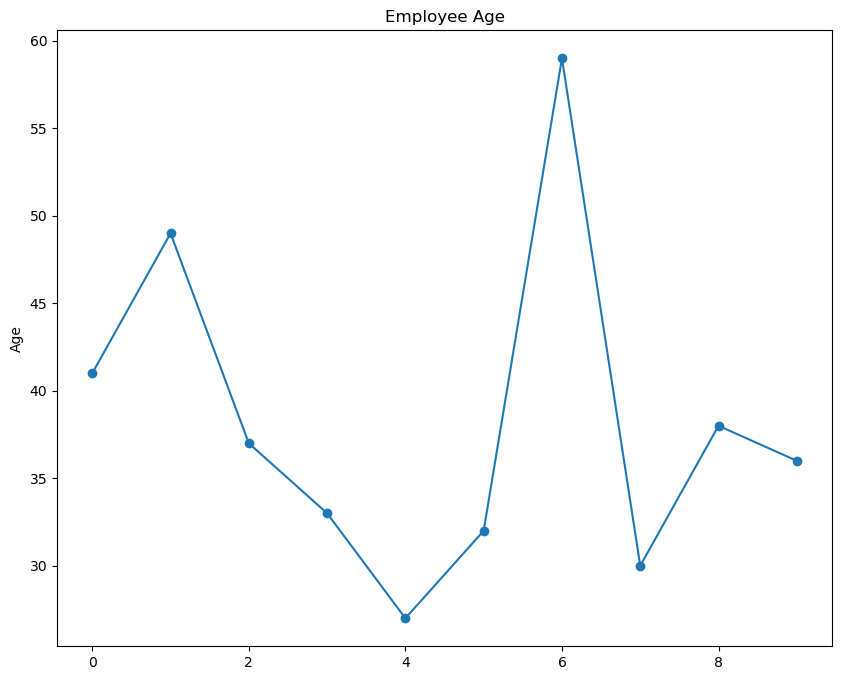

In [96]:
# 그래프 크기 조정
plt.figure(figsize = (10, 8))

# plt.plot(x, y, data = 데이터프레임, color='', linestyle='', marker='')
plt.plot('Age', data = attrition, marker='o')

plt.title('Employee Age')  # 그래프 이름
plt.ylabel('Age')  # y축 이름

plt.show()

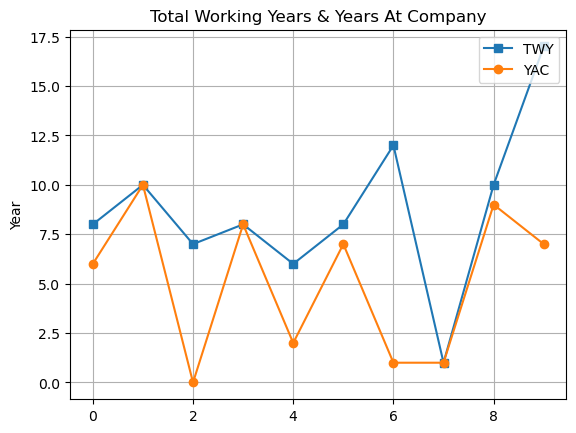

In [100]:
plt.plot('TotalWorkingYears', data = attrition, marker='s', label = 'TWY')
plt.plot('YearsAtCompany', data = attrition, marker='o', label = 'YAC')

plt.title('Total Working Years & Years At Company')
plt.ylabel('Year')
plt.legend(loc = 'upper right')  # 범례 추가
plt.grid()  # 그리드 추가 

plt.show()

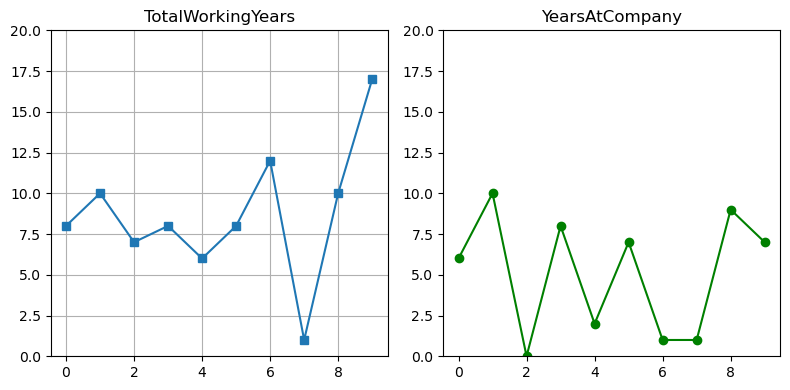

In [110]:
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot('TotalWorkingYears', data = attrition, marker='s')
plt.title('TotalWorkingYears')
plt.ylim(0, 20)  # y축 범위 설정
plt.grid()

plt.subplot(1, 2, 2)
plt.plot('YearsAtCompany', data = attrition, color='g', marker='o')
plt.title('YearsAtCompany')
plt.ylim(0, 20)

plt.tight_layout()  # 레이아웃 조정
plt.show()

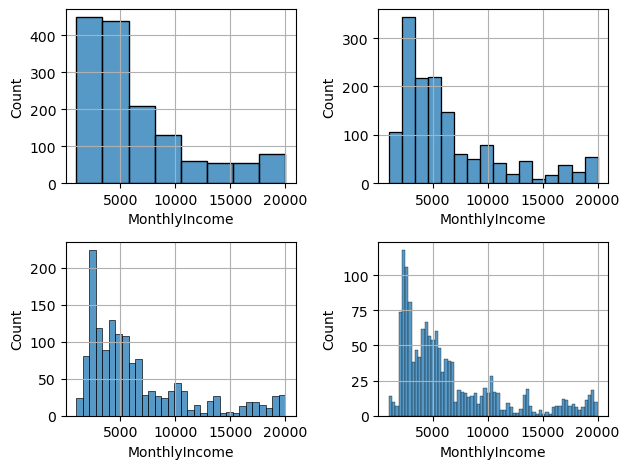

In [116]:
plt.subplot(2, 2, 1)
sns.histplot(x = 'MonthlyIncome', data = data, bins = 8)
plt.grid()

plt.subplot(2, 2, 2)
sns.histplot(x = 'MonthlyIncome', data = data, bins = 16)
plt.grid()

plt.subplot(2, 2, 3)
sns.histplot(x = 'MonthlyIncome', data = data, bins = 32)
plt.grid()

plt.subplot(2, 2, 4)
sns.histplot(x = 'MonthlyIncome', data = data, bins = 64)
plt.grid()

plt.tight_layout()
plt.show()

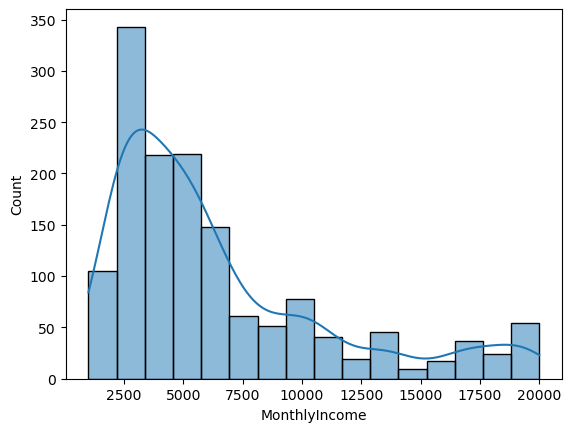

In [117]:
sns.histplot(x = 'MonthlyIncome', data = data, bins = 16, kde = True)
plt.show()

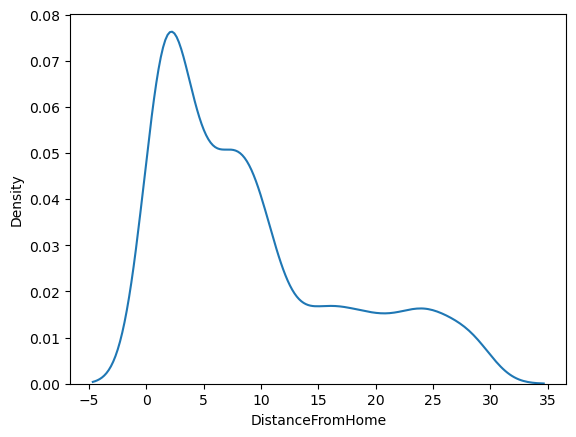

In [120]:
sns.kdeplot(x = 'DistanceFromHome', data = data)
plt.show()

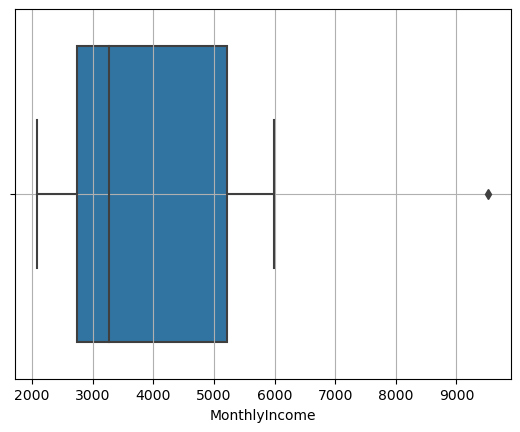

In [121]:
sns.boxplot(x = 'MonthlyIncome', data = attrition)
plt.grid()
plt.show()

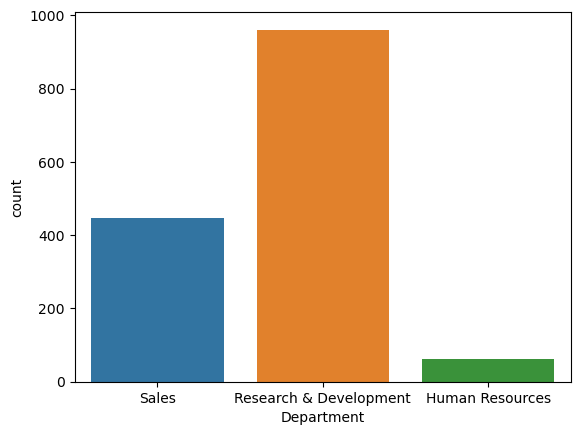

In [122]:
sns.countplot(x = 'Department', data = data)
plt.show()